# Exploritory Data Analysis

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## Reading/Investigating The Data

There are two Numeric values in the Whole Dataset

In [516]:
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name=1)

df.describe()

# 2 Numeric Values

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [517]:
#Investigating every value counts in the columns.

for column in df:
    print(df[column].value_counts())

Ptid
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: count, Length: 3424, dtype: int64
Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64
Gender
Female    3230
Male       194
Name: count, dtype: int64
Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64
Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64
Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64
Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64
Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                              

After investigating the value counts in the columns, it is clear that 

In [518]:
def detect_none(x):
    if x in ["Unknown", "Other/Unknown"]:
        return None
    else:
        return x

df = df.applymap(detect_none)

In [519]:
none_columns = df.isna().sum()

percent_none = none_columns[none_columns > 0] / len(df) * 100

percent_none

Race                        2.832944
Ethnicity                   2.657710
Region                      1.752336
Ntm_Speciality              9.053738
Risk_Segment_During_Rx     43.720794
Tscore_Bucket_During_Rx    43.720794
Change_T_Score             43.720794
Change_Risk_Segment        65.099299
dtype: float64

In [520]:
# Binary Values

for name, column in df.items():
    if column.nunique() == 2:
        print(name)

Persistency_Flag
Gender
Ethnicity
Ntm_Specialist_Flag
Gluco_Record_Prior_Ntm
Gluco_Record_During_Rx
Dexa_During_Rx
Frag_Frac_Prior_Ntm
Frag_Frac_During_Rx
Risk_Segment_Prior_Ntm
Tscore_Bucket_Prior_Ntm
Risk_Segment_During_Rx
Tscore_Bucket_During_Rx
Adherent_Flag
Idn_Indicator
Injectable_Experience_During_Rx
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
Comorb_Encounter_For_Immunization
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
Comorb_Vitamin_D_Deficiency
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
Comorb_Long_Term_Current_Drug_Therapy
Comorb_Dorsalgia
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
Comorb_Osteoporosis_without_current_pathological_fracture
Comorb_Personal_history_of_malignant_neoplasm
Comorb_Gastro_esophageal_reflux_disease
Concom_Cholestero

In [521]:
# Numeric Values

df.select_dtypes("int64").columns.to_list()

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [522]:
# Describe Numeric Values
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [523]:
df["Dexa_Freq_During_Rx"]

0       0
1       0
2       0
3       0
4       0
       ..
3419    0
3420    0
3421    7
3422    0
3423    0
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: int64

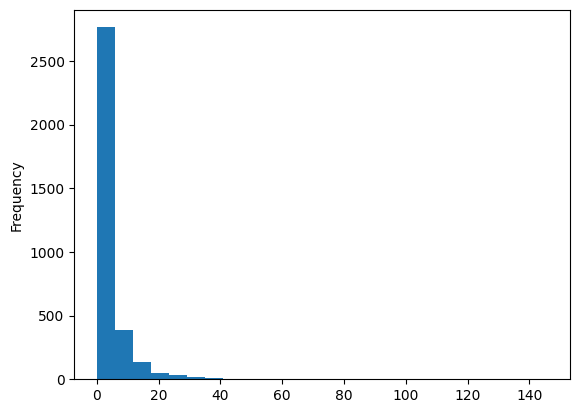

In [524]:
df["Dexa_Freq_During_Rx"].plot.hist(bins=25)
plt.show()

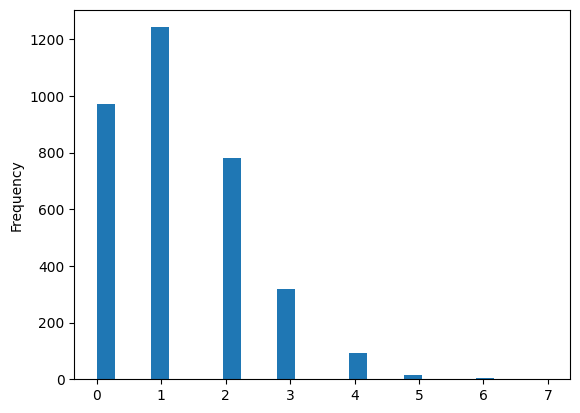

In [525]:
df["Count_Of_Risks"].plot.hist(bins=25)
plt.show()

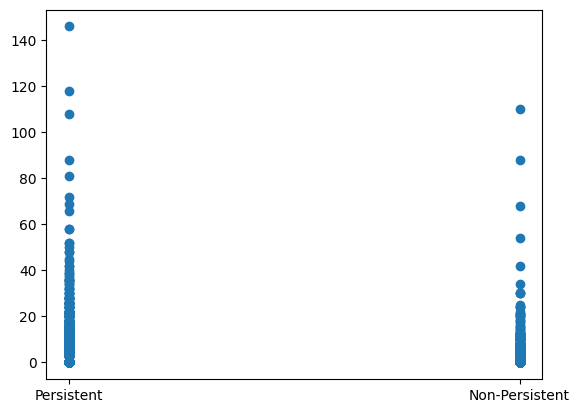

In [526]:
plt.scatter(df["Persistency_Flag"], df["Dexa_Freq_During_Rx"])
plt.show()

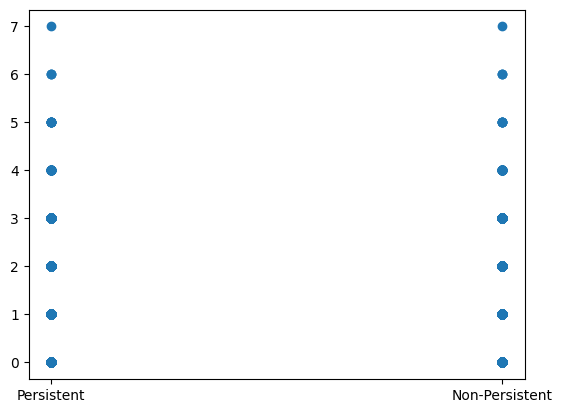

In [527]:
plt.scatter(df["Persistency_Flag"], df["Count_Of_Risks"])
plt.show()

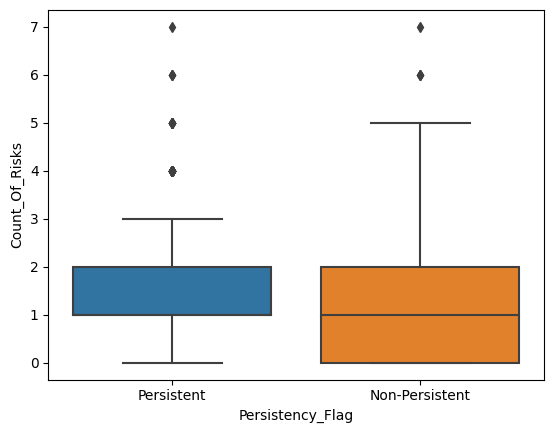

In [528]:
sns.boxplot(data=df, x="Persistency_Flag", y="Count_Of_Risks")
plt.show()

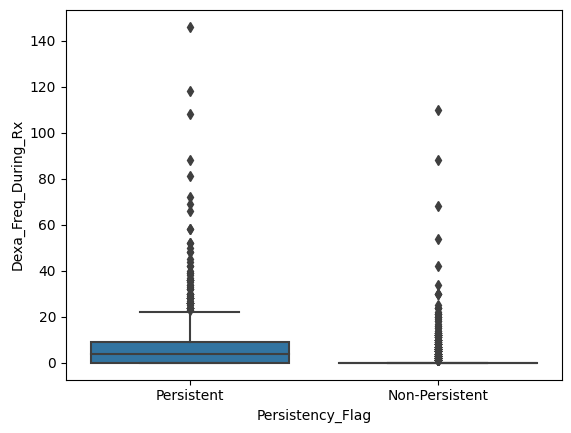

In [529]:
sns.boxplot(data=df, x="Persistency_Flag", y="Dexa_Freq_During_Rx")
plt.show()

In [530]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))]

   return outliers

In [531]:
find_outliers_IQR(df["Count_Of_Risks"])

817     7
1059    7
Name: Count_Of_Risks, dtype: int64

In [532]:
find_outliers_IQR(df["Dexa_Freq_During_Rx"])

32      20
33      13
62      12
65      20
89      10
        ..
3378    28
3382    26
3384    12
3396    10
3400    12
Name: Dexa_Freq_During_Rx, Length: 357, dtype: int64

In [533]:
none_columns = df.isna().sum()

percent_none = none_columns[none_columns > 0] / len(df) * 100

percent_none

Race                        2.832944
Ethnicity                   2.657710
Region                      1.752336
Ntm_Speciality              9.053738
Risk_Segment_During_Rx     43.720794
Tscore_Bucket_During_Rx    43.720794
Change_T_Score             43.720794
Change_Risk_Segment        65.099299
dtype: float64

In [534]:
df = df.drop(columns=["Risk_Segment_During_Rx",
                      "Tscore_Bucket_During_Rx",
                      "Change_T_Score",
                      "Change_Risk_Segment",])

In [535]:
len(df.columns)

65

## Data Cleansing

In [536]:
def fillnamode(df):
    most_frqnt_vlue = df.mode()[0]
    df = df.fillna(most_frqnt_vlue)
    return df

In [537]:
df["Race"] = fillnamode(df["Race"])
df["Ethnicity"] = fillnamode(df["Ethnicity"])
df["Region"] = fillnamode(df["Region"])
df["Ntm_Speciality"] = fillnamode(df["Ntm_Speciality"])

In [538]:

## 
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))]

   return outliers

In [539]:
outliers = find_outliers_IQR(df["Dexa_Freq_During_Rx"])

In [540]:
df.drop(index=outliers.index, inplace=True)

In [541]:
len(df)

3067

In [542]:
df["Count_Of_Risks"].value_counts()

Count_Of_Risks
1    1103
0     888
2     688
3     285
4      81
5      14
6       6
7       2
Name: count, dtype: int64

In [543]:
df["Dexa_Freq_During_Rx"].value_counts()

Dexa_Freq_During_Rx
0    2488
5     114
6     107
7      93
8      71
4      68
3      46
9      32
2      24
1      24
Name: count, dtype: int64

df

In [544]:
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3067 entries, 0 to 3423
Data columns (total 65 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3067 non-null   object
 1   Persistency_Flag                                                    3067 non-null   object
 2   Gender                                                              3067 non-null   object
 3   Race                                                                3067 non-null   object
 4   Ethnicity                                                           3067 non-null   object
 5   Region                                                              3067 non-null   object
 6   Age_Bucket                                                          3067 non-null   object
 7   Ntm_Speciality               

# First we need to convert non ints to floats.

# Chi square for Feuture engineering.

    In feature selection we aim to select the features which are highly dependent on the response. 

In [546]:
for column in df:
    if df[column].nunique() < 50 and df[column].dtype != "int64":
        df[column] = df[column].astype("category")

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3067 entries, 0 to 3423
Data columns (total 65 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Ptid                                                                3067 non-null   object  
 1   Persistency_Flag                                                    3067 non-null   category
 2   Gender                                                              3067 non-null   category
 3   Race                                                                3067 non-null   category
 4   Ethnicity                                                           3067 non-null   category
 5   Region                                                              3067 non-null   category
 6   Age_Bucket                                                          3067 non-null   category
 7   Ntm_Special

In [548]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    if df[i].dtype == "category":
        df[i] = le.fit_transform(df[i]) 

In [549]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,1,2,1,3,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,1,1,3,0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,2,0,0,1,5,0,1,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1


In [550]:
from sklearn.feature_selection import chi2




X = df.iloc[:, 2:]
y = df.iloc[:, 1]
chi_square = chi2(X, y)

In [551]:
p_scores = pd.Series(chi_square[1], X.columns)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


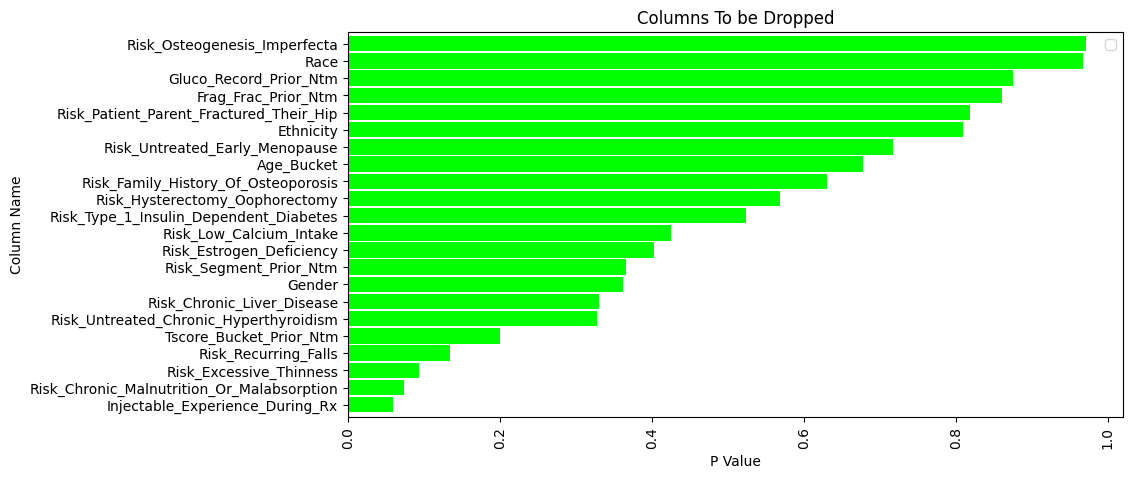

In [552]:
large_p_scores = p_scores[p_scores > 0.05]
plt.figure(figsize=(10, 5))
ax = large_p_scores.sort_values(ascending=True).plot.barh(width=0.9, color="#00ff00")

ax.set_title("Columns To be Dropped")
ax.set_xlabel("P Value")
ax.set_ylabel("Column Name")

ax.tick_params("x", rotation=90)
ax.legend()

In [553]:
df = df.drop(columns=large_p_scores.index)
len(df.columns)

43

In [554]:
df.head()

,Ptid,Persistency_Flag,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,...,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Immobilization,Count_Of_Risks
0,P1,1,3,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,3,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,P4,0,0,5,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,P5,0,0,5,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# Creating Train-Test Split and Upsampling.

In [555]:
# 62 percent non_persistent , 37 percent persistent 

df["Persistency_Flag"].value_counts() / len(df)

Persistency_Flag
0    0.676231
1    0.323769
Name: count, dtype: float64

In [556]:
y = df["Persistency_Flag"]
X = df.drop(columns=["Persistency_Flag", "Ptid"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=133)


X_train.shape, y_train.shape, X_test.shape, y_test.shape 
X_train = pd.concat([y_train, X_train], axis=1 )

In [557]:
X_train_persistent = X_train[X_train["Persistency_Flag"] == 1]
X_train_no_persistent = X_train[X_train["Persistency_Flag"] == 0]



In [558]:

X_train_persistent_upsampled = resample(X_train_persistent,
                                   replace=True,
                                   n_samples=len(X_train_no_persistent),
                                   random_state=1337)


In [559]:
X_train = pd.concat([X_train_no_persistent, X_train_persistent_upsampled], axis=0)

In [560]:
y_train = X_train["Persistency_Flag"]

In [505]:
X_train.drop(columns="Persistency_Flag", inplace=True)

# Training and Testing Models

In [506]:
# Since the metrics contain data and funcionality i preferred to create a Class.


class Metrics:
    
    
    labels = ["Persistent", "Not Persistent"]
    
    def __init__(self, y_true, y_pred, y_score):
        self.y_true = y_true
        self.y_pred = y_pred
        self.y_score = y_score
        self.accuracy = self.calculate_accuracy()
        self.precision = self.calculate_precision()
        self.recall = self.calculate_recall()
        self.f1_score = self.calculate_f1_score() 
        self.auc_roc = self.calculate_auc_roc()
    
    
    def calculate_accuracy(self):
        return metrics.accuracy_score(self.y_true, self.y_pred)

    
    def calculate_precision(self):
        return metrics.precision_score(self.y_true, self.y_pred)

    
    def calculate_recall(self):
        return metrics.recall_score(self.y_true, self.y_pred)

    
    def calculate_f1_score(self):
        return metrics.f1_score(self.y_true, self.y_pred)

    
    def calculate_auc_roc(self):
        return metrics.roc_auc_score(self.y_true, self.y_pred)
    
    
    def plot_confusion_roc_auc(self):
        # Creating A Plot For Confusion Matrix 
        
        cm = metrics.confusion_matrix(self.y_true, self.y_pred)
        fig = plt.figure(figsize=(15, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=self.labels, yticklabels=self.labels, ax=ax1)
        ax1.set_ylabel('True')
        ax1.set_xlabel('Prediction')
        ax1.set_title('Confusion Matrix')
        
        # Creatign A Plot For ROC - AUC
        
        fpr, tpr, _ = metrics.roc_curve(self.y_true, self.y_score, pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)
        
        ax2.plot(fpr, tpr, color='#008000',
             lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        ax2.plot([0, 1], [0, 1], color='#808080', lw=2, linestyle='--')
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('ROC-AUC')
        ax2.legend()
        
        

def results(metrics): 
    """
    Func For Printing and showing the results.
    """
    print("Accuracy: ", metrics.accuracy)
    print("Precision: ", metrics.precision)
    print("Recall: ",metrics.recall)
    print("F1 Score: ", metrics.f1_score)
    print("AUC-ROC: ", metrics.auc_roc)
    metrics.plot_confusion_roc_auc()

## Model 1 Logistic Regression(Base Model)

Accuracy:  0.7866449511400652
Precision:  0.6708860759493671
Recall:  0.75
F1 Score:  0.7082405345211581
AUC-ROC:  0.7779850746268656


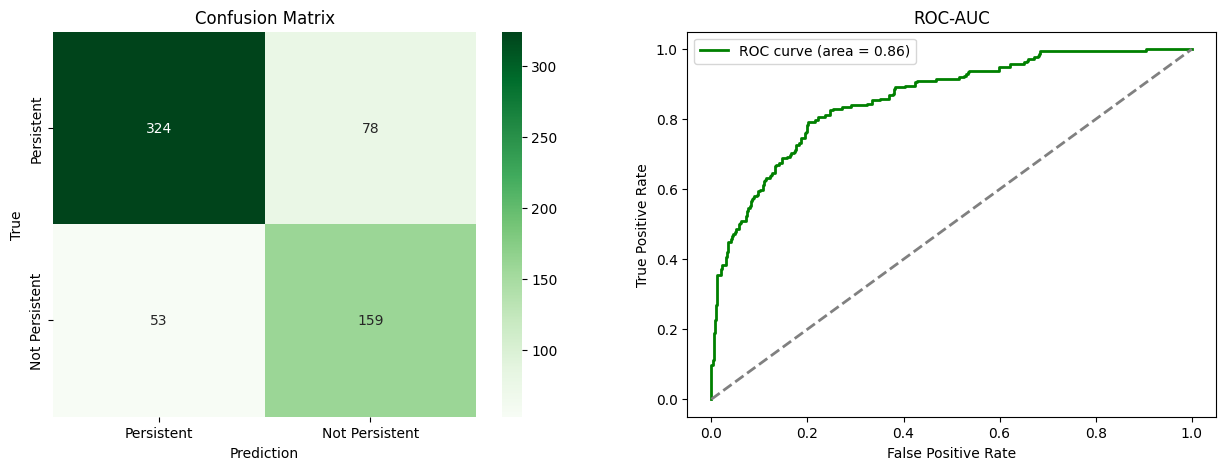

In [507]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_score_lr = lr.predict_proba(X_test)[:, 1]
lr_metrics = Metrics(y_test, y_pred_lr, y_score_lr)
results(lr_metrics)

## Model 2 Decision Tree

Accuracy:  0.6986970684039088
Precision:  0.5685279187817259
Recall:  0.5283018867924528
F1 Score:  0.5476772616136919
AUC-ROC:  0.6584295503614005


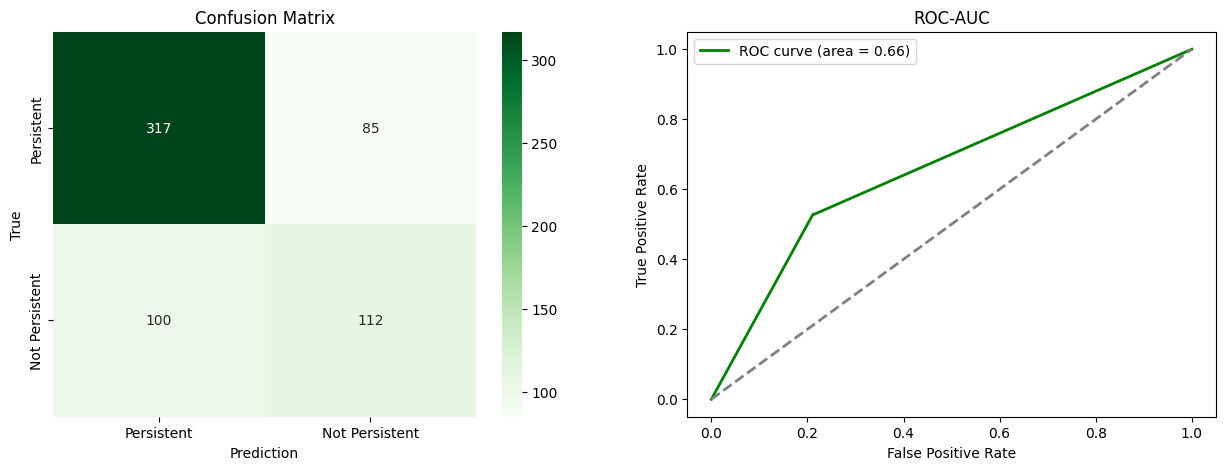

In [508]:
## Model 2 
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
y_score_dec_tree = dec_tree.predict_proba(X_test)[:, 1]
dec_tree_metrics = Metrics(y_test, y_pred_dec_tree, y_score_dec_tree)
results(dec_tree_metrics)


## Model 3 Random Forest Classifier

Accuracy:  0.7850162866449512
Precision:  0.75
Recall:  0.5660377358490566
F1 Score:  0.6451612903225807
AUC-ROC:  0.7332676241434337


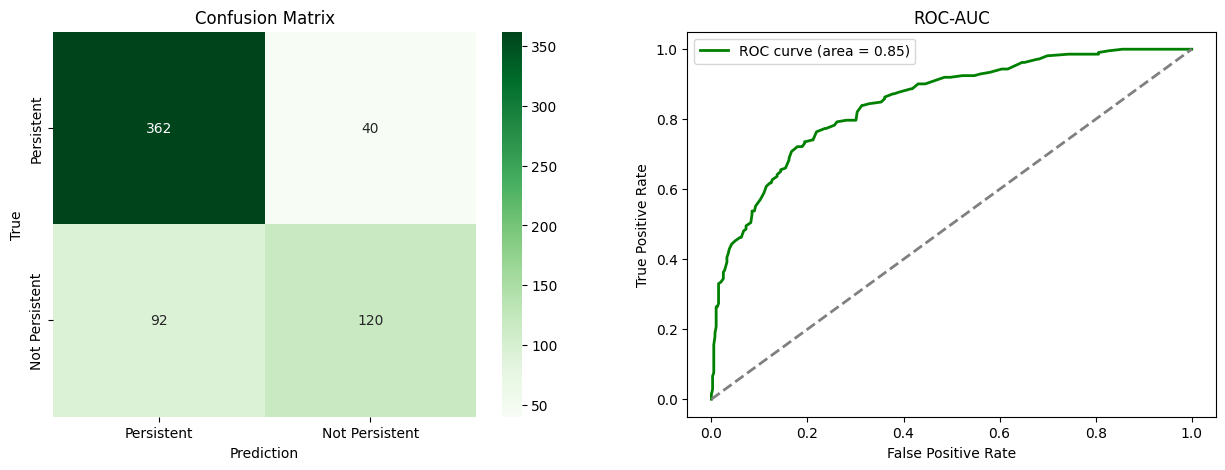

In [509]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_random_forest = rand_forest.predict(X_test)
y_score_random_forest = rand_forest.predict_proba(X_test)[:, 1]
rand_forest_metrics = Metrics(y_test, y_pred_random_forest, y_score_random_forest)
results(rand_forest_metrics)

## Model 4 Gradient Boosting

Accuracy:  0.7703583061889251
Precision:  0.6839378238341969
Recall:  0.6226415094339622
F1 Score:  0.6518518518518519
AUC-ROC:  0.735450107950812


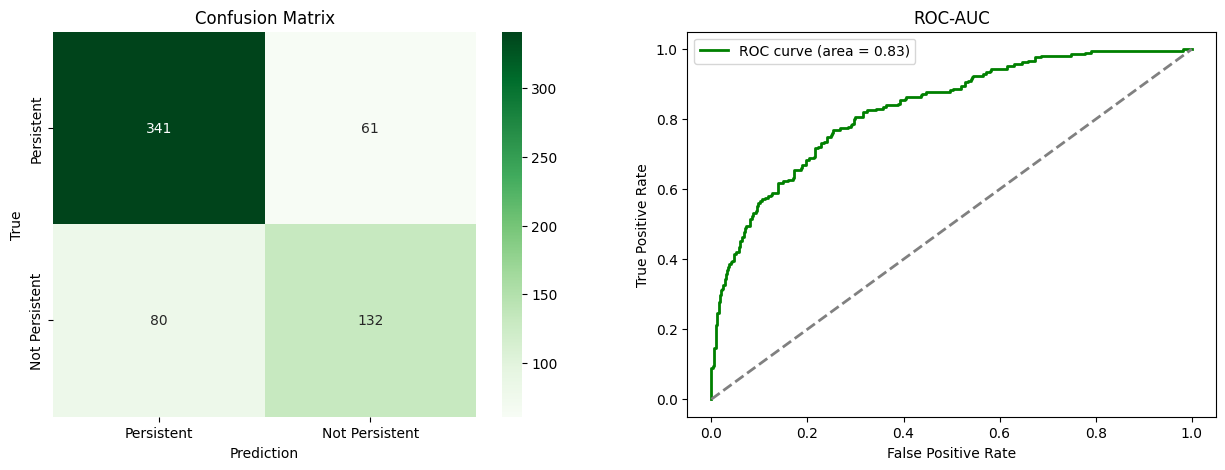

In [510]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_score_xgb = xgb.predict_proba(X_test)[:, 1]
xgb_metrics = Metrics(y_test, y_pred_xgb, y_score_xgb)
results(xgb_metrics)

## Model 5 Support Vector Machines

Accuracy:  0.8061889250814332
Precision:  0.7268292682926829
Recall:  0.7028301886792453
F1 Score:  0.7146282973621103
AUC-ROC:  0.7817633530460902


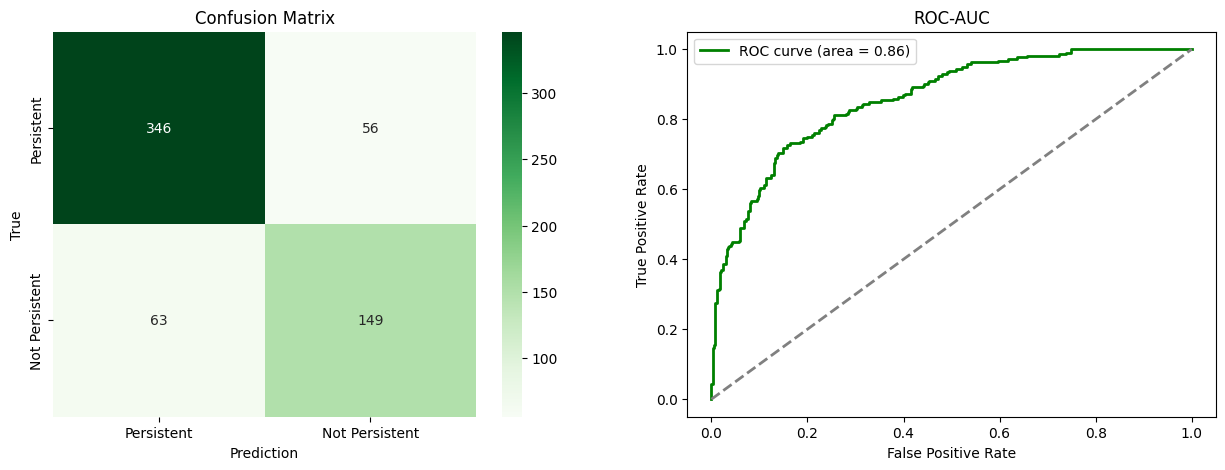

In [511]:
svmachine = svm.SVC(probability=True)
svmachine.fit(X_train, y_train)
y_pred_svm = svmachine.predict(X_test)
y_score_svm = svmachine.predict_proba(X_test)[:,1]
svm_metrics = Metrics(y_test, y_pred_svm, y_score_svm)
results(svm_metrics)

## Model 6 Neural Networks.

In [512]:
model = Sequential([
    Dense(64, activation="elu"),
    Dense(16, activation="elu"),
    Dense(1, activation="sigmoid")
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

20/20 [==============================] - 0s 1ms/step
Accuracy:  0.7899022801302932
Precision:  0.6781115879828327
Recall:  0.7452830188679245
F1 Score:  0.7101123595505618
AUC-ROC:  0.77935792734441


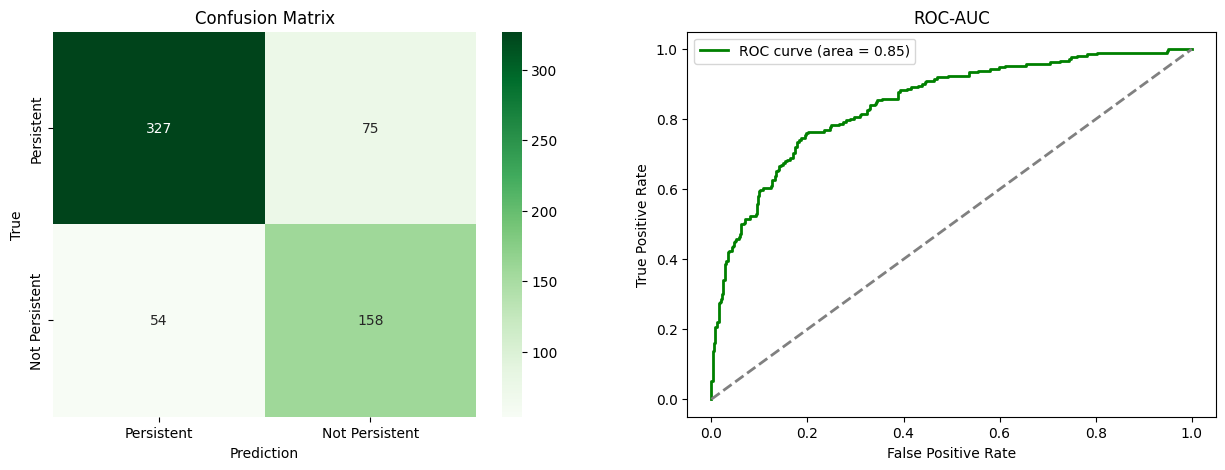

In [513]:
y_pred_dense = model.predict(X_test).round().reshape(-1, )
y_score_dense = model.predict(X_test).reshape(-1, )

dense_metrics = Metrics(y_test, y_pred_dense, y_score_dense)
results(dense_metrics)

# Using WOE / IV to impute values

In [341]:
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name=1)


In [342]:
df_woe = df.pivot_table(index="Gender", 
                        columns=["Persistency_Flag"],
                        values="Ptid",
                        aggfunc="count")



df_woe.head()



Persistency_Flag,Non-Persistent,Persistent
Gender,,
Female,2018,1212
Male,117,77


In [343]:

iv = pd.Series()


for i in range(2, len(df.columns)):
    

    df_woe = df.pivot_table(index=df.columns[i], 
                            columns=["Persistency_Flag"],
                            values="Ptid",
                            aggfunc="count")

    woe_iv = pd.DataFrame(columns=["woe", "iv"])
    for index, value in df_woe.iterrows():
        prcnt_bad = value["Non-Persistent"] / df_woe["Non-Persistent"].sum()
        prcnt_good = value["Persistent"] / df_woe["Persistent"].sum()
        woe_iv.loc[index, "woe"] =  np.log(prcnt_good / prcnt_bad) 
        woe_iv.loc[index, "iv"] =  woe_iv.loc[index, "woe"] * (prcnt_good - prcnt_bad)
        df[df.columns[i]].replace(index, woe_iv.loc[index, "woe"], inplace=True)
    df_woe_iv = pd.concat([df_woe, woe_iv], axis=1)

    df_woe_iv.loc["Total"] = df_woe_iv.sum()
    iv[df.columns[i]] = df_woe_iv.loc["Total", "iv"]

    

df_woe_iv

,Non-Persistent,Persistent,woe,iv
0,658,312,-0.241602,0.015982
1,771,471,0.01177,0.00005
2,467,314,0.107664,0.002677
3,179,138,0.244468,0.005676
4,50,41,0.306149,0.002568
5,6,9,0.910065,0.003797
6,3,3,0.5046,0.000465
7,1,1,0.5046,0.000155
Total,2135,1289,2.347713,0.03137


In [344]:
iv.apply(round, ndigits=2).sort_values(ascending=False)

Dexa_Freq_During_Rx                                       1.23
Dexa_During_Rx                                            1.08
Comorb_Long_Term_Current_Drug_Therapy                     0.53
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms    0.46
Comorb_Encounter_For_Immunization                         0.43
                                                          ... 
Risk_Type_1_Insulin_Dependent_Diabetes                    0.00
Gluco_Record_Prior_Ntm                                    0.00
Frag_Frac_Prior_Ntm                                       0.00
Risk_Segment_Prior_Ntm                                    0.00
Gender                                                    0.00
Length: 67, dtype: float64

In [345]:
iv[iv>0.02] # Values that have a bigger information value than 0.2

Region                                                                0.037770
Ntm_Speciality                                                        0.183746
Ntm_Specialist_Flag                                                   0.082444
Ntm_Speciality_Bucket                                                 0.131573
Gluco_Record_During_Rx                                                0.188239
Dexa_Freq_During_Rx                                                   1.226500
Dexa_During_Rx                                                        1.079775
Frag_Frac_During_Rx                                                   0.046922
Risk_Segment_During_Rx                                                0.142689
Tscore_Bucket_During_Rx                                               0.144785
Change_T_Score                                                        0.205294
Change_Risk_Segment                                                   0.053638
Adherent_Flag                                       

In [346]:
df.drop(columns = iv[iv<0.02].index, inplace=True)

In [347]:
df.head()

,Ptid,Persistency_Flag,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,...,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Smoking_Tobacco,Risk_Vitamin_D_Insufficiency,Count_Of_Risks
0,P1,Persistent,0.280560,-0.240802,-0.249537,-0.245418,-0.273037,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,-0.098665,-0.160988,-0.241602
1,P2,Non-Persistent,0.280560,-0.240802,-0.249537,-0.245418,-0.273037,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,-0.098665,-0.160988,-0.241602
2,P3,Non-Persistent,-0.227854,-0.240802,-0.249537,-0.245418,-0.273037,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,-0.098665,-0.160988,0.107664
3,P4,Non-Persistent,-0.227854,-0.240802,-0.249537,-0.245418,0.700344,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,1.323727,0.405139,-0.160988,0.011770
4,P5,Non-Persistent,-0.227854,-0.240802,-0.249537,-0.245418,0.700344,-0.701987,-0.701987,-0.083083,...,0.352063,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,0.405139,-0.160988,0.011770


## Creating Train-Test Split

In [398]:
y = df["Persistency_Flag"].values
X = df.drop(columns=["Persistency_Flag", "Ptid"]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=133)


X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((2453, 41), (2453,), (614, 41), (614,))

## Model 7 Using Logistic Regression with WOE imputed data.

Accuracy:  0.7866449511400652
Precision:  0.6708860759493671
Recall:  0.75
F1 Score:  0.7082405345211581
AUC-ROC:  0.7779850746268656


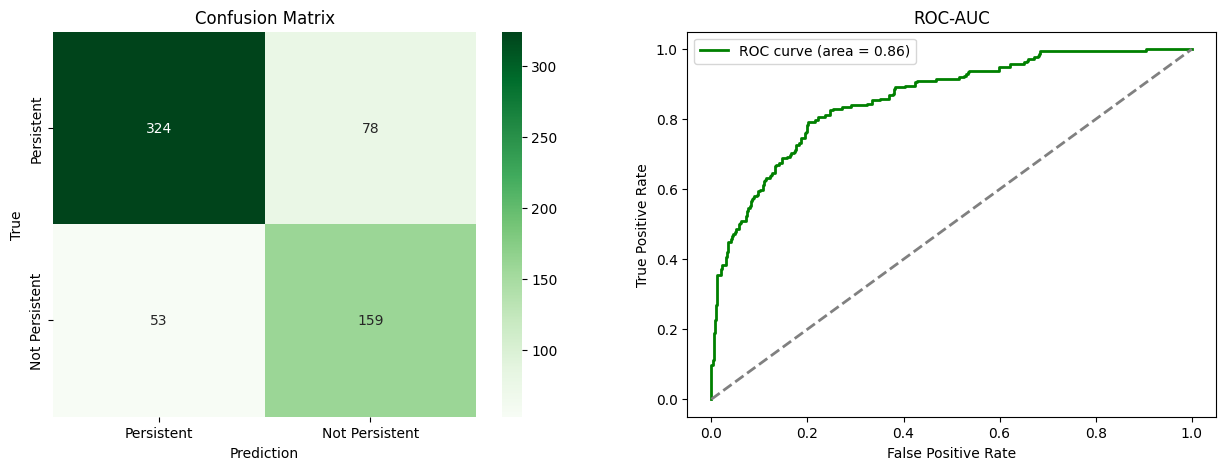

In [514]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_score_lr = lr.predict_proba(X_test)[:, 1]
lr_woe_metrics = Metrics(y_test, y_pred_lr, y_score_lr)
results(lr_woe_metrics)